# Exploratory Data and Analysis

Now I will get an initial glimpse of the posts and comments datasets, clean and organize data, etc

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sysadmin_post_df = pd.read_csv('./datasets/sysadmin_posts.csv')
sysadmin_comm_df = pd.read_csv('./datasets/sysadmin_comments.csv')
programming_post_df = pd.read_csv('./datasets/programming_posts.csv')
programming_comm_df = pd.read_csv('./datasets/programming_comments.csv')

### Let's start with r/sysadmin posts

In [3]:
sysadmin_post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5991 entries, 0 to 5990
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5991 non-null   object
 1   created_utc   5991 non-null   int64 
 2   selftext      5854 non-null   object
 3   subreddit     5991 non-null   object
 4   author        5991 non-null   object
 5   permalink     5991 non-null   object
 6   num_comments  5991 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 327.8+ KB


In [6]:
#this goes back to February 22, 2022
sysadmin_post_df['created_utc'].min()

1645550563

In [7]:
#create a column labeling this as sysadmin data
sysadmin_post_df['Category'] = 'sysadmin'
sysadmin_post_df['Post_comment'] = 'Post'
sysadmin_post_df

,title,created_utc,selftext,subreddit,author,permalink,num_comments,Category,Post_comment
0,UPDATE: How to make VMWare Remote Console Work...,1649907326,We got it working!\n\n[Here is what we were wo...,sysadmin,HanSolo71,/r/sysadmin/comments/u385rb/update_how_to_make...,0,sysadmin,Post
1,Windows Server License Terms,1649907297,Hi Everyone \nMy question is really short. \...,sysadmin,Pyme93,/r/sysadmin/comments/u385fz/windows_server_lic...,0,sysadmin,Post
2,Help with a Freeradius3,1649906743,"Hi all, I am looking for some help with a free...",sysadmin,Nvious81,/r/sysadmin/comments/u37zom/help_with_a_freera...,0,sysadmin,Post
3,If our servers crash this Friday,1649906368,"Will they come back to live on Sunday, fixing ...",sysadmin,bjngjie,/r/sysadmin/comments/u37vkh/if_our_servers_cra...,0,sysadmin,Post
4,Is it me or is it the job?,1649905702,So I’m coming up on my 7th year at working at ...,sysadmin,Snorlax_420,/r/sysadmin/comments/u37od5/is_it_me_or_is_it_...,0,sysadmin,Post
...,...,...,...,...,...,...,...,...,...
5986,"Century link static, need some help",1645551474,"Been on hold for a while, figured I would get ...",sysadmin,nickcasa,/r/sysadmin/comments/sytc42/century_link_stati...,0,sysadmin,Post
5987,Issues installing Print Management Role,1645550911,I am trying to install print management role o...,sysadmin,ITDerm,/r/sysadmin/comments/syt460/issues_installing_...,0,sysadmin,Post
5988,How can I deploy Computer Policies to a comput...,1645550772,"Windows 10 Pro, OpenVPN connection.\n\nWe're s...",sysadmin,segagamer,/r/sysadmin/comments/syt27n/how_can_i_deploy_c...,0,sysadmin,Post
5989,Group just for Basic Admin Rights,1645550692,Is there any built in groups for Basic admin r...,sysadmin,Simpuhl,/r/sysadmin/comments/syt139/group_just_for_bas...,0,sysadmin,Post


In [8]:
sysadmin_post_df.drop(columns='permalink',inplace=True)

See below: 299 posts have been [removed] out of 5,991 -- roughly 5%

In [9]:
sysadmin_post_df[sysadmin_post_df['selftext']=='[removed]']

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment
36,"Google Chrome error ""side-by-side configuration""",1649883969,[removed],sysadmin,OkMachine6924,1,sysadmin,Post
71,Made sense of: APPLE STARTS MANUFACTURING IPHO...,1649870014,[removed],sysadmin,techylog,1,sysadmin,Post
100,Looking for advice on the current company setup,1649860522,[removed],sysadmin,systerfyster,1,sysadmin,Post
110,IT Asset management system/software,1649857642,[removed],sysadmin,SomethingRegular,1,sysadmin,Post
162,Do you know this malware?,1649807168,[removed],sysadmin,grep65535,0,sysadmin,Post
...,...,...,...,...,...,...,...,...
5874,Backup Software with PKI,1645631639,[removed],sysadmin,krn6000,1,sysadmin,Post
5890,"Server 2019 standard, request computer certifi...",1645624168,[removed],sysadmin,np05573,0,sysadmin,Post
5909,Dell NIC firmware to intel OEM E810 network card.,1645614315,[removed],sysadmin,dev--24,1,sysadmin,Post
5930,"Server 2019 standard, request computer certifi...",1645584516,[removed],sysadmin,np05573,0,sysadmin,Post


137 posts do not have a selftext (they are posts with a title and no further text) <br>
That is to say, 2% of posts do not include additional text beyond the title

In [10]:
sysadmin_post_df[sysadmin_post_df['selftext'].isna()]

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment
47,User account deleted by domain controller comp...,1649877433,NaN,sysadmin,josefismael,0,sysadmin,Post
53,What is your preferred tool for imaging device...,1649876145,NaN,sysadmin,Ginjiruu,0,sysadmin,Post
76,Cannot disable this Office365 alert function,1649867615,NaN,sysadmin,joeyl5,0,sysadmin,Post
106,Pricing for and buying Microsoft Defender for ...,1649858234,NaN,sysadmin,Sasataf12,0,sysadmin,Post
120,It's Time to Migrate to Microsoft Graph PowerS...,1649853807,NaN,sysadmin,Embry_,0,sysadmin,Post
...,...,...,...,...,...,...,...,...
5661,Guide: Photo management. Sorting the hoard.,1645768718,NaN,sysadmin,mr-octo_squid,0,sysadmin,Post
5688,Github ssh access to multiple repos,1645739546,NaN,sysadmin,sudo_96,0,sysadmin,Post
5889,Top 5 Techniques to Optimize and Reduce Micros...,1645624605,NaN,sysadmin,Emma__24,0,sysadmin,Post
5892,New 5 min survey for developers building on to...,1645623657,NaN,sysadmin,vjmde,0,sysadmin,Post


In [11]:
#but every post has a title!
sysadmin_post_df[sysadmin_post_df['title'].isna()]

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment


In [12]:
#some authors are more prolific posters than others
#but ultimately there are 3531 unique authors (that we know of)
sysadmin_post_df['author'].value_counts()[:10]

jwckauman          36
maxcoder88         28
AutoModerator      23
sukur55            18
BrightSign_nerd    16
pointAtopointA     14
graceyin39         14
Real_Lemon8789     13
techylog           13
tripsteady         12
Name: author, dtype: int64

### Same for r/programming posts

In [13]:
programming_post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5993 non-null   object
 1   created_utc   5993 non-null   int64 
 2   selftext      26 non-null     object
 3   subreddit     5993 non-null   object
 4   author        5993 non-null   object
 5   permalink     5993 non-null   object
 6   num_comments  5993 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 327.9+ KB


In [15]:
#this goes back to February 1, 2022
programming_post_df['created_utc'].min()

1643759749

In [16]:
#create a column labeling this as Quantum data, posts
programming_post_df['Category'] = 'programming'
programming_post_df['Post_comment'] = 'Post'

In [17]:
programming_post_df.drop(columns='permalink',inplace=True)

See below: 0 posts have been [removed] out of 5,993 -- roughly 0%

In [18]:
programming_post_df[programming_post_df['selftext']=='[removed]']

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment


5,967 posts do not have a selftext (they are posts with a title and no further text) <br>
That is to say, 99% of posts do not include additional text beyond the title

In [19]:
programming_post_df[programming_post_df['selftext'].isna()]

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment
0,Algorithm Analysis,1649905566,NaN,programming,xalg0rd,0,programming,Post
1,Deploy Seeker search augmented conversational ...,1649901284,NaN,programming,louis030195,0,programming,Post
2,Algorithm Analysis – Data and File Structures,1649898352,NaN,programming,xalg0rd,0,programming,Post
3,Is there an online API for Baking Textures?,1649896730,NaN,programming,USMANHEART,0,programming,Post
4,Github billing bug displays multi-million doll...,1649894660,NaN,programming,AnonymousSeeker5,0,programming,Post
...,...,...,...,...,...,...,...,...
5988,Javascript Tetris,1643768052,NaN,programming,thepan73,0,programming,Post
5989,Learn How DoorDash built a No Code platform fo...,1643764603,NaN,programming,kishore-guruswamy,0,programming,Post
5990,SPA WITHOUT FRAMEWORKS,1643761874,NaN,programming,oppai_silverman,0,programming,Post
5991,A plain English description of monads without ...,1643760401,NaN,programming,Chrisdone2,0,programming,Post


In [20]:
#but every post has a title!
programming_post_df[programming_post_df['title'].isna()]

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment


In [22]:
#some authors are more prolific posters than others
#but ultimately there are 2392 unique authors (that we know of)
programming_post_df['author'].value_counts()

IsDaouda_Games          498
ETIPFREE                164
Matlabguru              122
feross                  107
Starlight-786            89
                       ... 
Ztsec                     1
buritomath                1
PhotojournalistHuge3      1
starkdigitalmedia         1
ballihacker               1
Name: author, Length: 2392, dtype: int64

#### Creating a field to combine 'title' and 'selftext'
The idea being, I just want to parse through one field rather than multiples when I eventually tokenize, etc.

In [23]:
#my combination formula below won't work unless I change the NaN into ~something~
#so I'm going to fill any null values with the word 'the' which is rather common and innocuous
sysadmin_post_df['selftext'].fillna('the',inplace=True)
programming_post_df['selftext'].fillna('the',inplace=True)

In [24]:
sysadmin_post_df['combo_text'] = sysadmin_post_df['title'] + ' ' + sysadmin_post_df['selftext']
programming_post_df['combo_text'] = programming_post_df['title'] + ' ' + programming_post_df['selftext']

In [25]:
sysadmin_post_df.head()

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment,combo_text
0,UPDATE: How to make VMWare Remote Console Work...,1649907326,We got it working!\n\n[Here is what we were wo...,sysadmin,HanSolo71,0,sysadmin,Post,UPDATE: How to make VMWare Remote Console Work...
1,Windows Server License Terms,1649907297,Hi Everyone \nMy question is really short. \...,sysadmin,Pyme93,0,sysadmin,Post,Windows Server License Terms Hi Everyone \nMy...
2,Help with a Freeradius3,1649906743,"Hi all, I am looking for some help with a free...",sysadmin,Nvious81,0,sysadmin,Post,"Help with a Freeradius3 Hi all, I am looking f..."
3,If our servers crash this Friday,1649906368,"Will they come back to live on Sunday, fixing ...",sysadmin,bjngjie,0,sysadmin,Post,If our servers crash this Friday Will they com...
4,Is it me or is it the job?,1649905702,So I’m coming up on my 7th year at working at ...,sysadmin,Snorlax_420,0,sysadmin,Post,Is it me or is it the job? So I’m coming up on...


In [26]:
programming_post_df.head()

,title,created_utc,selftext,subreddit,author,num_comments,Category,Post_comment,combo_text
0,Algorithm Analysis,1649905566,the,programming,xalg0rd,0,programming,Post,Algorithm Analysis the
1,Deploy Seeker search augmented conversational ...,1649901284,the,programming,louis030195,0,programming,Post,Deploy Seeker search augmented conversational ...
2,Algorithm Analysis – Data and File Structures,1649898352,the,programming,xalg0rd,0,programming,Post,Algorithm Analysis – Data and File Structures the
3,Is there an online API for Baking Textures?,1649896730,the,programming,USMANHEART,0,programming,Post,Is there an online API for Baking Textures? the
4,Github billing bug displays multi-million doll...,1649894660,the,programming,AnonymousSeeker5,0,programming,Post,Github billing bug displays multi-million doll...


In [27]:
# how many words in each comob_text? How many characters? This is the naive split
sysadmin_post_df['word_count'] = [len(i.split()) for i in sysadmin_post_df['combo_text']]
programming_post_df['word_count'] = [len(i.split()) for i in programming_post_df['combo_text']]

(0.0, 1000.0)

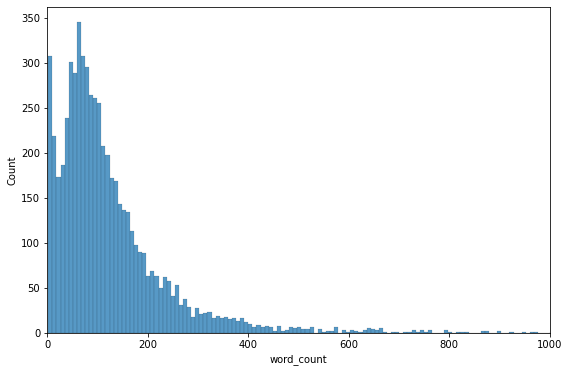

In [35]:
plt.figure(figsize=(9,6))
sns.histplot(sysadmin_post_df['word_count'],bins=500)
plt.xlim(0,1000)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

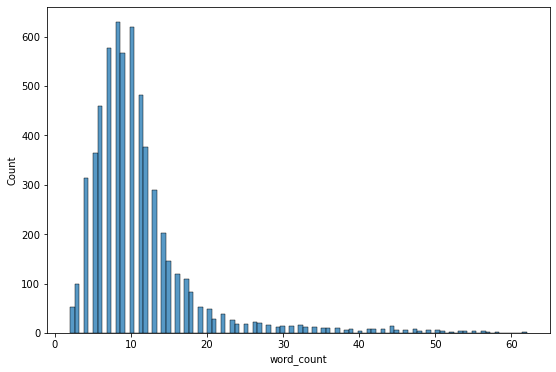

In [38]:
plt.figure(figsize=(9,6))
sns.histplot(programming_post_df['word_count'],bins=100)
#plt.xlim(0,100)

## Now to the comments!

In [39]:
sysadmin_comm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   body         9989 non-null   object
 1   created_utc  9989 non-null   int64 
 2   subreddit    9989 non-null   object
 3   author       9989 non-null   object
 4   permalink    9989 non-null   object
dtypes: int64(1), object(4)
memory usage: 390.3+ KB


In [41]:
#this goes back to April 11, 2022
sysadmin_comm_df['created_utc'].min()

1649684847

In [42]:
sysadmin_comm_df['Category'] = 'sysadmin'
sysadmin_comm_df['Post_comment'] = 'Comment'
sysadmin_comm_df

,body,created_utc,subreddit,author,permalink,Category,Post_comment
0,On my 15th (and hopefully final) year in the s...,1649908394,sysadmin,hatchikyu,/r/sysadmin/comments/u1yxbt/job_descriptions_t...,sysadmin,Comment
1,This is why a lot of us dont mention when we s...,1649908319,sysadmin,Aggravating_Refuse89,/r/sysadmin/comments/u2pr07/ceo_has_recently_s...,sysadmin,Comment
2,Yeah I’ve been through that - delayed start wa...,1649908315,sysadmin,M_Keating,/r/sysadmin/comments/u1q5q5/patch_tuesday_mega...,sysadmin,Comment
3,From a guy that started in finance and moved t...,1649908220,sysadmin,civbat,/r/sysadmin/comments/u36i7z/im_never_seeing_th...,sysadmin,Comment
4,In my experience a TAM is an account manager w...,1649908182,sysadmin,mrhoopers,/r/sysadmin/comments/u3524r/whelp_i_did_it/i4n...,sysadmin,Comment
...,...,...,...,...,...,...,...
9984,Early-days Atlassian had a strong appeal - the...,1649684953,sysadmin,ShillionaireMorty,/r/sysadmin/comments/u14qqq/atlassian_just_gav...,sysadmin,Comment
9985,For your comment on the disconnected RDP sessi...,1649684950,sysadmin,Pirated_Freeware,/r/sysadmin/comments/u15k3i/security_cadence_k...,sysadmin,Comment
9986,"Once your body adjusts to caffeine, coke, mdma...",1649684901,sysadmin,Isord,/r/sysadmin/comments/u14qqq/atlassian_just_gav...,sysadmin,Comment
9987,I wonder if the stats for salary exempt and sa...,1649684900,sysadmin,Hangikjot,/r/sysadmin/comments/u0xdxw/entitled_users_on_...,sysadmin,Comment


In [43]:
sysadmin_comm_df.drop(columns='permalink',inplace=True)
sysadmin_comm_df

,body,created_utc,subreddit,author,Category,Post_comment
0,On my 15th (and hopefully final) year in the s...,1649908394,sysadmin,hatchikyu,sysadmin,Comment
1,This is why a lot of us dont mention when we s...,1649908319,sysadmin,Aggravating_Refuse89,sysadmin,Comment
2,Yeah I’ve been through that - delayed start wa...,1649908315,sysadmin,M_Keating,sysadmin,Comment
3,From a guy that started in finance and moved t...,1649908220,sysadmin,civbat,sysadmin,Comment
4,In my experience a TAM is an account manager w...,1649908182,sysadmin,mrhoopers,sysadmin,Comment
...,...,...,...,...,...,...
9984,Early-days Atlassian had a strong appeal - the...,1649684953,sysadmin,ShillionaireMorty,sysadmin,Comment
9985,For your comment on the disconnected RDP sessi...,1649684950,sysadmin,Pirated_Freeware,sysadmin,Comment
9986,"Once your body adjusts to caffeine, coke, mdma...",1649684901,sysadmin,Isord,sysadmin,Comment
9987,I wonder if the stats for salary exempt and sa...,1649684900,sysadmin,Hangikjot,sysadmin,Comment


A total of 39 (= 22 + 13) comments have been removed or deleted <br>
That's a rate of roughly 0.4%

In [47]:
sysadmin_comm_df[sysadmin_comm_df['body']=='[removed]']

,body,created_utc,subreddit,author,Category,Post_comment
786,[removed],1649884902,sysadmin,[deleted],sysadmin,Comment
2372,[removed],1649860709,sysadmin,[deleted],sysadmin,Comment
2805,[removed],1649856421,sysadmin,[deleted],sysadmin,Comment
2925,[removed],1649854705,sysadmin,[deleted],sysadmin,Comment
3268,[removed],1649845452,sysadmin,[deleted],sysadmin,Comment
3291,[removed],1649844735,sysadmin,[deleted],sysadmin,Comment
4024,[removed],1649811537,sysadmin,[deleted],sysadmin,Comment
4153,[removed],1649807937,sysadmin,[deleted],sysadmin,Comment
4904,[removed],1649790895,sysadmin,[deleted],sysadmin,Comment
5095,[removed],1649787473,sysadmin,[deleted],sysadmin,Comment


In [50]:
sysadmin_comm_df[sysadmin_comm_df['body']=='[deleted]']

,body,created_utc,subreddit,author,Category,Post_comment
1372,[deleted],1649872671,sysadmin,[deleted],sysadmin,Comment
2077,[deleted],1649863506,sysadmin,[deleted],sysadmin,Comment
2341,[deleted],1649861034,sysadmin,[deleted],sysadmin,Comment
2615,[deleted],1649858211,sysadmin,[deleted],sysadmin,Comment
2885,[deleted],1649855224,sysadmin,[deleted],sysadmin,Comment
3209,[deleted],1649848524,sysadmin,[deleted],sysadmin,Comment
4269,[deleted],1649804797,sysadmin,[deleted],sysadmin,Comment
4474,[deleted],1649799271,sysadmin,[deleted],sysadmin,Comment
4836,[deleted],1649792070,sysadmin,[deleted],sysadmin,Comment
5916,[deleted],1649777012,sysadmin,[deleted],sysadmin,Comment


In [51]:
#removing the rows with deleted or removed comments
sysadmin_comm_df = sysadmin_comm_df[sysadmin_comm_df['body'] != '[removed]']
sysadmin_comm_df = sysadmin_comm_df[sysadmin_comm_df['body'] != '[deleted]']
sysadmin_comm_df

,body,created_utc,subreddit,author,Category,Post_comment
0,On my 15th (and hopefully final) year in the s...,1649908394,sysadmin,hatchikyu,sysadmin,Comment
1,This is why a lot of us dont mention when we s...,1649908319,sysadmin,Aggravating_Refuse89,sysadmin,Comment
2,Yeah I’ve been through that - delayed start wa...,1649908315,sysadmin,M_Keating,sysadmin,Comment
3,From a guy that started in finance and moved t...,1649908220,sysadmin,civbat,sysadmin,Comment
4,In my experience a TAM is an account manager w...,1649908182,sysadmin,mrhoopers,sysadmin,Comment
...,...,...,...,...,...,...
9984,Early-days Atlassian had a strong appeal - the...,1649684953,sysadmin,ShillionaireMorty,sysadmin,Comment
9985,For your comment on the disconnected RDP sessi...,1649684950,sysadmin,Pirated_Freeware,sysadmin,Comment
9986,"Once your body adjusts to caffeine, coke, mdma...",1649684901,sysadmin,Isord,sysadmin,Comment
9987,I wonder if the stats for salary exempt and sa...,1649684900,sysadmin,Hangikjot,sysadmin,Comment


There are 4,410 unique comment authors. The top 5 commenters account for 2% of all comments posted

In [52]:
sysadmin_comm_df['author'].value_counts()

anonymousITCoward       58
ZAFJB                   48
indi53                  45
tsg-tsg                 39
AmSoDoneWithThisShit    36
                        ..
buggeryorkshire          1
Infinity10-10            1
FeralSparky              1
DearChinaFuckYou         1
Cee1510                  1
Name: author, Length: 4410, dtype: int64

In [53]:
#naive word count
sysadmin_comm_df['word_count'] = [len(i.split()) for i in sysadmin_comm_df['body']]
sysadmin_comm_df

,body,created_utc,subreddit,author,Category,Post_comment,word_count
0,On my 15th (and hopefully final) year in the s...,1649908394,sysadmin,hatchikyu,sysadmin,Comment,22
1,This is why a lot of us dont mention when we s...,1649908319,sysadmin,Aggravating_Refuse89,sysadmin,Comment,30
2,Yeah I’ve been through that - delayed start wa...,1649908315,sysadmin,M_Keating,sysadmin,Comment,45
3,From a guy that started in finance and moved t...,1649908220,sysadmin,civbat,sysadmin,Comment,82
4,In my experience a TAM is an account manager w...,1649908182,sysadmin,mrhoopers,sysadmin,Comment,270
...,...,...,...,...,...,...,...
9984,Early-days Atlassian had a strong appeal - the...,1649684953,sysadmin,ShillionaireMorty,sysadmin,Comment,218
9985,For your comment on the disconnected RDP sessi...,1649684950,sysadmin,Pirated_Freeware,sysadmin,Comment,17
9986,"Once your body adjusts to caffeine, coke, mdma...",1649684901,sysadmin,Isord,sysadmin,Comment,23
9987,I wonder if the stats for salary exempt and sa...,1649684900,sysadmin,Hangikjot,sysadmin,Comment,33


### All the same for quantum comments

In [55]:
programming_comm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   body         9942 non-null   object
 1   created_utc  9942 non-null   int64 
 2   subreddit    9942 non-null   object
 3   author       9942 non-null   object
 4   permalink    9942 non-null   object
dtypes: int64(1), object(4)
memory usage: 388.5+ KB


In [57]:
#this goes back to April 3, 2022
programming_comm_df['created_utc'].min()

1649005025

In [58]:
programming_comm_df['Category'] = 'programming'
programming_comm_df['Post_comment'] = 'Comment'
programming_comm_df

,body,created_utc,subreddit,author,permalink,Category,Post_comment
0,"From my experience, the more managers use the ...",1649908434,programming,d4rkwing,/r/programming/comments/u304hd/agile_and_the_l...,programming,Comment
1,Big agree. I've been really struggling at my l...,1649908360,programming,Neurotrace,/r/programming/comments/u304hd/agile_and_the_l...,programming,Comment
2,My Jenkins docker image running with two docke...,1649908048,programming,HorseRadish98,/r/programming/comments/u3474m/github_billing_...,programming,Comment
3,"Ah that’s part of the issue, no matter what I ...",1649907978,programming,aloha2436,/r/programming/comments/u304hd/agile_and_the_l...,programming,Comment
4,"Jenkins recommends two hosts, a jenkins master...",1649907973,programming,bastardoperator,/r/programming/comments/u3474m/github_billing_...,programming,Comment
...,...,...,...,...,...,...,...
9937,Mainly how to evaluate programming books. I wo...,1649005450,programming,Ralumier,/r/programming/comments/tv6hh4/whats_the_gener...,programming,Comment
9938,"Joke's on you, I'm gonna start a band called ""...",1649005321,programming,ilovetacos,/r/programming/comments/tv9atw/horrible_edge_c...,programming,Comment
9939,The idea that a developer can ever fully under...,1649005239,programming,chillermane,/r/programming/comments/tvcn38/bad_developers_...,programming,Comment
9940,&gt; Do people not get the word sometimes? \n\...,1649005027,programming,alcohol_enthusiast_,/r/programming/comments/tuzr2r/wordle_is_nphar...,programming,Comment


In [59]:
programming_comm_df.drop(columns='permalink',inplace=True)
programming_comm_df

,body,created_utc,subreddit,author,Category,Post_comment
0,"From my experience, the more managers use the ...",1649908434,programming,d4rkwing,programming,Comment
1,Big agree. I've been really struggling at my l...,1649908360,programming,Neurotrace,programming,Comment
2,My Jenkins docker image running with two docke...,1649908048,programming,HorseRadish98,programming,Comment
3,"Ah that’s part of the issue, no matter what I ...",1649907978,programming,aloha2436,programming,Comment
4,"Jenkins recommends two hosts, a jenkins master...",1649907973,programming,bastardoperator,programming,Comment
...,...,...,...,...,...,...
9937,Mainly how to evaluate programming books. I wo...,1649005450,programming,Ralumier,programming,Comment
9938,"Joke's on you, I'm gonna start a band called ""...",1649005321,programming,ilovetacos,programming,Comment
9939,The idea that a developer can ever fully under...,1649005239,programming,chillermane,programming,Comment
9940,&gt; Do people not get the word sometimes? \n\...,1649005027,programming,alcohol_enthusiast_,programming,Comment


A total of 40 (= 19 + 21) comments have been removed or deleted <br>
That's a rate of roughly 0.4%

In [62]:
programming_comm_df[programming_comm_df['body']=='[removed]']

,body,created_utc,subreddit,author,Category,Post_comment
467,[removed],1649858149,programming,[deleted],programming,Comment
1194,[removed],1649809086,programming,[deleted],programming,Comment
1587,[removed],1649793101,programming,[deleted],programming,Comment
2497,[removed],1649738459,programming,[deleted],programming,Comment
3039,[removed],1649693654,programming,[deleted],programming,Comment
3225,[removed],1649684926,programming,[deleted],programming,Comment
3486,[removed],1649658913,programming,[deleted],programming,Comment
3487,[removed],1649658866,programming,[deleted],programming,Comment
3849,[removed],1649610721,programming,[deleted],programming,Comment
4045,[removed],1649591353,programming,[deleted],programming,Comment


In [65]:
programming_comm_df[programming_comm_df['body']=='[deleted]']

,body,created_utc,subreddit,author,Category,Post_comment
54,[deleted],1649899470,programming,[deleted],programming,Comment
257,[deleted],1649873454,programming,[deleted],programming,Comment
409,[deleted],1649862867,programming,[deleted],programming,Comment
454,[deleted],1649859013,programming,[deleted],programming,Comment
932,[deleted],1649823302,programming,[deleted],programming,Comment
1786,[deleted],1649786188,programming,[deleted],programming,Comment
2258,[deleted],1649765059,programming,[deleted],programming,Comment
2928,[deleted],1649699266,programming,[deleted],programming,Comment
5733,[deleted],1649435149,programming,[deleted],programming,Comment
6210,[deleted],1649405479,programming,[deleted],programming,Comment


In [68]:
#removing the rows with deleted or removed comments
programming_comm_df = programming_comm_df[programming_comm_df['body'] != '[removed]']
programming_comm_df = programming_comm_df[programming_comm_df['body'] != '[deleted]']
programming_comm_df

,body,created_utc,subreddit,author,Category,Post_comment
0,"From my experience, the more managers use the ...",1649908434,programming,d4rkwing,programming,Comment
1,Big agree. I've been really struggling at my l...,1649908360,programming,Neurotrace,programming,Comment
2,My Jenkins docker image running with two docke...,1649908048,programming,HorseRadish98,programming,Comment
3,"Ah that’s part of the issue, no matter what I ...",1649907978,programming,aloha2436,programming,Comment
4,"Jenkins recommends two hosts, a jenkins master...",1649907973,programming,bastardoperator,programming,Comment
...,...,...,...,...,...,...
9937,Mainly how to evaluate programming books. I wo...,1649005450,programming,Ralumier,programming,Comment
9938,"Joke's on you, I'm gonna start a band called ""...",1649005321,programming,ilovetacos,programming,Comment
9939,The idea that a developer can ever fully under...,1649005239,programming,chillermane,programming,Comment
9940,&gt; Do people not get the word sometimes? \n\...,1649005027,programming,alcohol_enthusiast_,programming,Comment


In [69]:
programming_comm_df[programming_comm_df['body'].isna()]

,body,created_utc,subreddit,author,Category,Post_comment


In [70]:
programming_comm_df = programming_comm_df[programming_comm_df['body'].isna() == False]
programming_comm_df

,body,created_utc,subreddit,author,Category,Post_comment
0,"From my experience, the more managers use the ...",1649908434,programming,d4rkwing,programming,Comment
1,Big agree. I've been really struggling at my l...,1649908360,programming,Neurotrace,programming,Comment
2,My Jenkins docker image running with two docke...,1649908048,programming,HorseRadish98,programming,Comment
3,"Ah that’s part of the issue, no matter what I ...",1649907978,programming,aloha2436,programming,Comment
4,"Jenkins recommends two hosts, a jenkins master...",1649907973,programming,bastardoperator,programming,Comment
...,...,...,...,...,...,...
9937,Mainly how to evaluate programming books. I wo...,1649005450,programming,Ralumier,programming,Comment
9938,"Joke's on you, I'm gonna start a band called ""...",1649005321,programming,ilovetacos,programming,Comment
9939,The idea that a developer can ever fully under...,1649005239,programming,chillermane,programming,Comment
9940,&gt; Do people not get the word sometimes? \n\...,1649005027,programming,alcohol_enthusiast_,programming,Comment


There are 4,343 unique comment authors. The top 5 commenters account for 4% of all comments posted

In [72]:
programming_comm_df['author'].value_counts()

grauenwolf          119
Lucky_Mood9912       98
Numerous-Buy9770     71
immibis              69
Full-Spectral        57
                   ... 
atilaneves            1
damoex                1
626f776572            1
merlinblack           1
NintendoLove          1
Name: author, Length: 4343, dtype: int64

In [73]:
#naive word count
programming_comm_df['word_count'] = [len(i.split()) for i in programming_comm_df['body']]
programming_comm_df

,body,created_utc,subreddit,author,Category,Post_comment,word_count
0,"From my experience, the more managers use the ...",1649908434,programming,d4rkwing,programming,Comment,24
1,Big agree. I've been really struggling at my l...,1649908360,programming,Neurotrace,programming,Comment,46
2,My Jenkins docker image running with two docke...,1649908048,programming,HorseRadish98,programming,Comment,16
3,"Ah that’s part of the issue, no matter what I ...",1649907978,programming,aloha2436,programming,Comment,47
4,"Jenkins recommends two hosts, a jenkins master...",1649907973,programming,bastardoperator,programming,Comment,42
...,...,...,...,...,...,...,...
9937,Mainly how to evaluate programming books. I wo...,1649005450,programming,Ralumier,programming,Comment,28
9938,"Joke's on you, I'm gonna start a band called ""...",1649005321,programming,ilovetacos,programming,Comment,15
9939,The idea that a developer can ever fully under...,1649005239,programming,chillermane,programming,Comment,172
9940,&gt; Do people not get the word sometimes? \n\...,1649005027,programming,alcohol_enthusiast_,programming,Comment,43


#### Saving my EDA DataFrames to prep them for the next workbooks

In [75]:
sysadmin_post_df.to_csv('./datasets/eda_sysadmin_post.csv')
sysadmin_comm_df.to_csv('./datasets/eda_sysadmin_comment.csv')
programming_post_df.to_csv('./datasets/eda_programming_post.csv')
programming_comm_df.to_csv('./datasets/eda_programming_comment.csv')

The rest below is just some toying around that I'll carry out on the next sheets; I'm just testing things out for now

(0.0, 200.0)

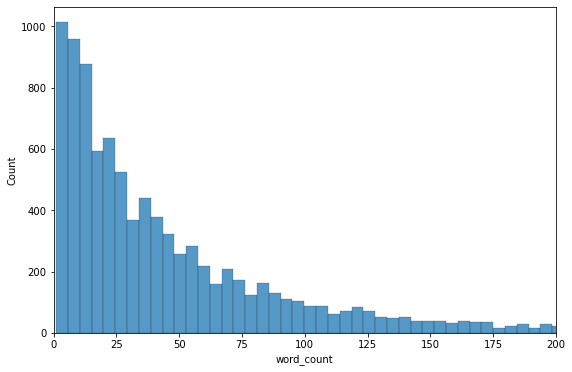

In [256]:
plt.figure(figsize=(9,6))
sns.histplot(astro_comm_df['word_count'],bins=250)
plt.xlim(0,200)

(0.0, 200.0)

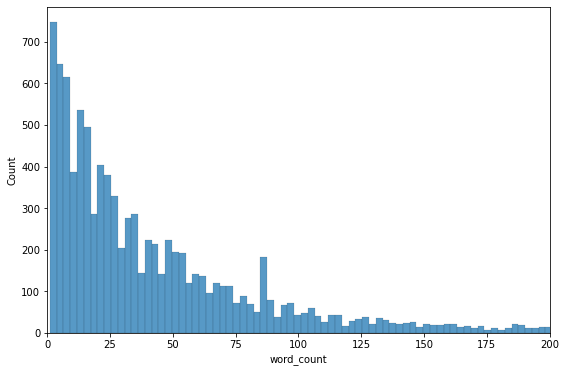

In [257]:
plt.figure(figsize=(9,6))
sns.histplot(quantum_comm_df['word_count'],bins=500)
plt.xlim(0,200)

In [258]:
astro_comm_df['body'][1]

'&gt; 760 mph\n\nJust to clarify, thats the speed of sound in air at 1 atm 20 degrees celsius.'

In [259]:
astro_comm_df['body'].replace('[^\w ]','',regex=True)

0       Your mum says your pole is more like 2 inches ...
1       gt 760 mphJust to clarify thats the speed of s...
2       Threw this git repo together httpsgithubcomSha...
3                        oh okay thanks for clearing that
4       again the movement needs to propagate through ...
                              ...                        
9995    You can make similar conclusions about redshif...
9996    Trust me  you can usually busk it Depends on h...
9997    Light has a frequency that can be measured Wha...
9998    The interplay between story details and the ph...
9999    I disagree with this  semiconductor physics mo...
Name: body, Length: 9481, dtype: object

In [260]:
astro_comm_df[astro_comm_df['body'].str.find('?') > -1]

,body,created_utc,subreddit,author,Category,Post_comment,word_count
5,if i try to rotate that stick?🤔 \n\nthe other ...,1617219238,astrophysics,AryanPandey,Astrophysics,Comment,27
7,[https://www.youtube.com/watch?v=rrUvLlrvgxQ](...,1617215190,astrophysics,RaghavendraKaushik,Astrophysics,Comment,9
8,What if the pole was an elementary particle li...,1617214993,astrophysics,PlayerBrat,Astrophysics,Comment,78
9,https://www.youtube.com/watch?v=EPsG8td7C5k,1617208691,astrophysics,theillini19,Astrophysics,Comment,1
14,"I'll have another look at it, eq.13 in particu...",1617205223,astrophysics,Saashiv01,Astrophysics,Comment,53
...,...,...,...,...,...,...,...
9929,Yeah I’m only 16 but most of my inspiration co...,1579671481,astrophysics,Toezs,Astrophysics,Comment,37
9938,I thought your post above said that accelerati...,1579579370,astrophysics,Barethyu,Astrophysics,Comment,17
9947,What do you envision doing at NASA? It's quite...,1579569223,astrophysics,nivlark,Astrophysics,Comment,65
9968,Why could you pass through anything using a wa...,1579455918,astrophysics,sjvsthxfhg,Astrophysics,Comment,42


In [261]:
astro_comm_df['body'][5]

'if i try to rotate that stick?🤔 \n\nthe other end of the 2 light year long stick will rotate instantly? or it will rotate after 2 years?'

In [288]:
astro_post_df.nlargest(10,'word_count')['combo_text']

3425    What if Einstein was right for the wrong reaso...
2051    EVERYTHING YOU THINK YOU KNOW ABOUT TIME IS WR...
2001    Cosmic anisotropy has been detected in the X-r...
847     Okay HEAR ME OUT, on my ideas of black holes a...
5905    A Brief Summary of Modern Astrophysics Our mod...
3923    Working on a science fiction novel, but I want...
4084    the unit of time \n  Time\n\nIs time actually ...
5842    Make scientific history - help test this theor...
5040    Faith in Science? Dark matter and Dark energy?...
2286    I work in the space sector after my BsC in CS ...
Name: combo_text, dtype: object

In [286]:
astro_comm_df.nlargest(10,'word_count')

,body,created_utc,subreddit,author,Category,Post_comment,word_count
5903,I like to believe that consciousness comes fro...,1593979893,astrophysics,Jehovahswetnips,Astrophysics,Comment,1177
1190,Absolutely! And that's the beauty of the topic...,1611024128,astrophysics,sibi33,Astrophysics,Comment,879
2492,"For people with ADHD, good luck reading this l...",1606443886,astrophysics,JonesCali,Astrophysics,Comment,850
8800,"&gt;If the sun were to die, would Jupiter; the...",1584480466,astrophysics,RUacronym,Astrophysics,Comment,807
9047,Most don't have names but here's a list of the...,1583438700,astrophysics,rexregisanimi,Astrophysics,Comment,798
7913,"This comment is really puzzling, basically mak...",1587900305,astrophysics,lettuce_field_theory,Astrophysics,Comment,781
2953,Great choice of topic!\n\n&gt; Is one of the s...,1604241562,astrophysics,xilefakamot,Astrophysics,Comment,761
8981,This question is purely in the realm of philos...,1583753832,astrophysics,MrPatko0770,Astrophysics,Comment,742
4805,While a lot of people here try to push physics...,1597146097,astrophysics,listens_to_galaxies,Astrophysics,Comment,733
3196,This is a massively complicated topic that has...,1603393067,astrophysics,Hubnerite,Astrophysics,Comment,673


<AxesSubplot:xlabel='created_utc', ylabel='word_count'>

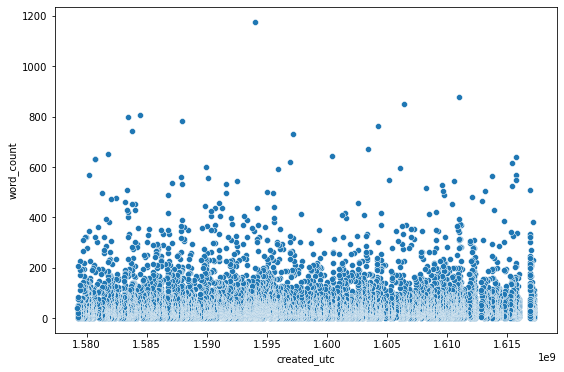

In [290]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=astro_comm_df,x='created_utc',y='word_count')

<AxesSubplot:xlabel='created_utc', ylabel='word_count'>

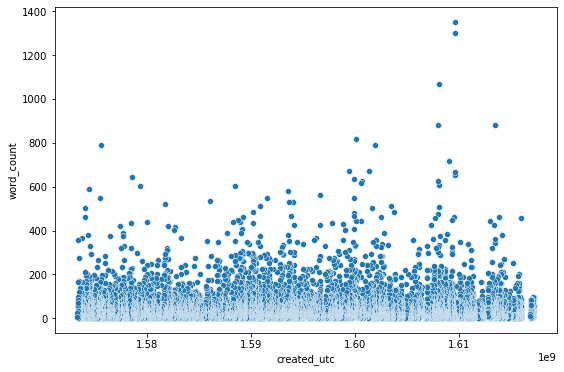

In [291]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=quantum_comm_df,x='created_utc',y='word_count')

(0.0, 500.0)

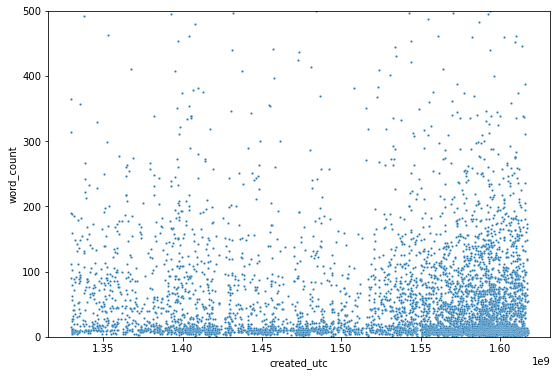

In [306]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=astro_post_df,x='created_utc',y='word_count',s=5)
plt.ylim(0,500)

(0.0, 500.0)

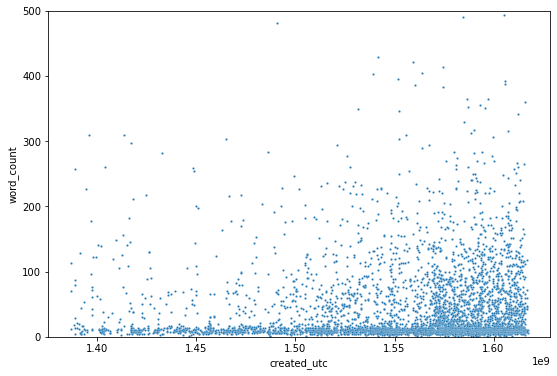

In [301]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=quantum_post_df,x='created_utc',y='word_count',s=5)
plt.ylim(0,500)

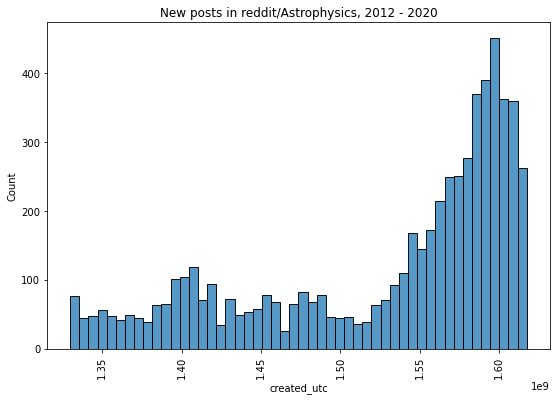

In [21]:
plt.figure(figsize=(9,6))
sns.histplot(astro_post_df['created_utc'],bins=50)
plt.xticks(rotation=90)
plt.title("New posts in reddit/Astrophysics, 2012 - 2020")
plt.savefig('./images/astro_posts_overtime.png')

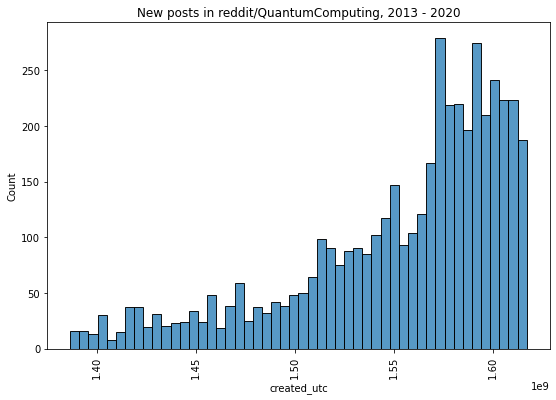

In [20]:
plt.figure(figsize=(9,6))
sns.histplot(quantum_post_df['created_utc'],bins=50)
plt.xticks(rotation=90)
plt.title("New posts in reddit/QuantumComputing, 2013 - 2020")
plt.savefig('./images/qc_posts_overtime.png')